# # Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

The following cell shows the program training a decision tree and its results in preciction

In [ ]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)


[0.96666667 1.         0.86666667 0.86666667 1.        ]


The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

In [ ]:
from sklearn import neighbors
import pandas as pd
n_neighbors = 11
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn = clf_knn.fit(iris.data, iris.target)
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)
# shows the model predictions with pandas
k_nn_results = []

for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted=clf_knn.predict(instance)[0]
    k_nn_results.append({
        'Instance': i,
        iris.feature_names[0]: iris.data[i,0],
        iris.feature_names[1]: iris.data[i,1],
        iris.feature_names[2]: iris.data[i,2],
        iris.feature_names[3]: iris.data[i,3],
        'Predicted class': iris.target_names[predicted],
        'True class': iris.target_names[iris.target[i]],
        'Correct': 'Yes' if predicted == iris.target[i] else 'No'
    })

results_df = pd.DataFrame(k_nn_results)
print(results_df.to_string(index=False, float_format='%.1f'))

[0.93333333 1.         1.         0.96666667 1.        ]
 Instance  sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm) Predicted class True class Correct
        0                5.1               3.5                1.4               0.2          setosa     setosa     Yes
        1                4.9               3.0                1.4               0.2          setosa     setosa     Yes
        2                4.7               3.2                1.3               0.2          setosa     setosa     Yes
        3                4.6               3.1                1.5               0.2          setosa     setosa     Yes
        4                5.0               3.6                1.4               0.2          setosa     setosa     Yes
        5                5.4               3.9                1.7               0.4          setosa     setosa     Yes
        6                4.6               3.4                1.4               0.3          setosa     setosa

In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

In [ ]:
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn2.fit(iris.data, iris.target)
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores2)

# shows the model predictions with pandas
k_nn2_results = []

for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted=clf_knn2.predict(instance)[0]
    k_nn2_results.append({
        'Instance': i,
        iris.feature_names[0]: iris.data[i,0],
        iris.feature_names[1]: iris.data[i,1],
        iris.feature_names[2]: iris.data[i,2],
        iris.feature_names[3]: iris.data[i,3],
        'Predicted class': iris.target_names[predicted],
        'True class': iris.target_names[iris.target[i]],
        'Correct': 'Yes' if predicted == iris.target[i] else 'No'
    })

results_df = pd.DataFrame(k_nn2_results)
print(results_df.to_string(index=False, float_format='%.1f'))

[0.96666667 1.         1.         0.96666667 1.        ]
 Instance  sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm) Predicted class True class Correct
        0                5.1               3.5                1.4               0.2          setosa     setosa     Yes
        1                4.9               3.0                1.4               0.2          setosa     setosa     Yes
        2                4.7               3.2                1.3               0.2          setosa     setosa     Yes
        3                4.6               3.1                1.5               0.2          setosa     setosa     Yes
        4                5.0               3.6                1.4               0.2          setosa     setosa     Yes
        5                5.4               3.9                1.7               0.4          setosa     setosa     Yes
        6                4.6               3.4                1.4               0.3          setosa     setosa

The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).



best k=7
best accuracy=0.9666666666666667


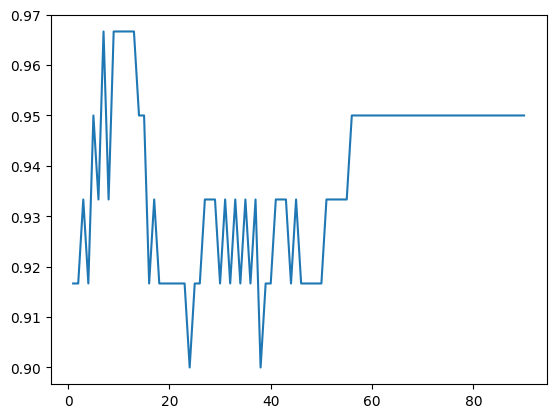

In [ ]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

best_accuracy=0
best_k=1
A=np.zeros(len(y_train), dtype=np.float64) # for storing accuracies
for n_neighbors in np.arange(1,len(y_train)+1):
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
    clf_knn3.fit(X_train, y_train)
    index=n_neighbors-1
    A[index]=clf_knn3.score(X_test, y_test)
    if best_accuracy<clf_knn3.score(X_test, y_test):
        best_accuracy=clf_knn3.score(X_test, y_test)
        best_k=n_neighbors
    #print("k neighbors="+str(n_neighbors))
    #print("accuracy="+str(clf_knn3.score(X_test, y_test)))

print("\n")
print("best k="+str(best_k))
print("best accuracy="+str(best_accuracy))

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.xticks(np.arange(1, len(y_train)+1, 8))
plt.yticks(np.arange(0.0,1.0,0.01))

plt.plot(np.arange(1,len(y_train)+1),A)

plt.show()

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting
of the vote of the neighbours (uniform and with distance)

weighting:uniform


best k=7
best accuracy=0.9666666666666667
weighting:distance


best k=7
best accuracy=0.9666666666666667


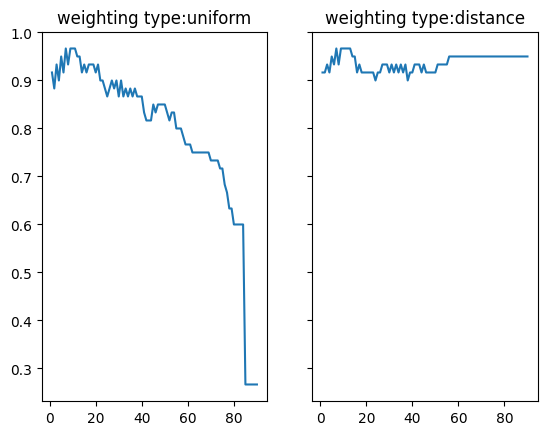

In [ ]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

i=0  #parameter in the control of the subplot to draw on'
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
for weight_type in ['uniform','distance']:
    print("weighting:"+str(weight_type))
    A=np.zeros(len(y_train), dtype=np.float64) # for storing accuracies
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1
        A[index]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        #print("k neighbors="+str(n_neighbors))
        #print("accuracy="+str(clf_knn2.score(X_test, y_test)))

    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    if i==0:
        ax1.plot(np.arange(1,len(y_train)+1),A)
        ax1.set_title('weighting type:'+str(weight_type))
    else:
        ax2.plot(np.arange(1,len(y_train)+1),A)
        ax2.set_title('weighting type:'+str(weight_type))
    i=i+1

plt.show()


In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting
of the vote of the neighbours (uniform and with distance)


 weighting:uniform
best k=7
best accuracy=0.9666666666666667

 weighting:distance
best k=7
best accuracy=0.9666666666666667


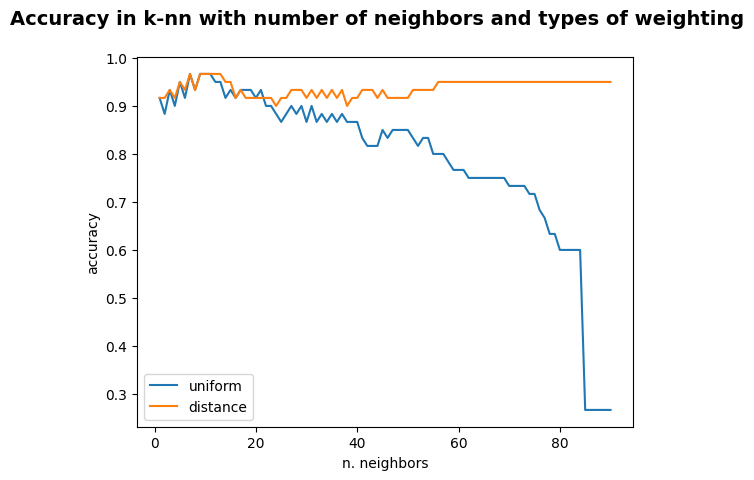

In [ ]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

fig = plt.figure()
fig.suptitle('Accuracy in k-nn with number of neighbors and types of weighting', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')

A=np.zeros((len(y_train),2), dtype=np.float64) # 2 arrays for storing accuracies for each type of weigthing
i=0  #parameter in the control of the different diagram (=matrix A column index)
best_accuracy=0
for weight_type in ['uniform','distance']:
    print("\n weighting:"+str(weight_type))
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1 # computes the matrix row index
        A[index,i]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        #print("k neighbors="+str(n_neighbors))
        #print("accuracy="+str(clf_knn2.score(X_test, y_test)))

    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    plt.plot(np.arange(1,len(y_train)+1),A[:,i])
    i=i+1
plt.legend(['uniform', 'distance'], loc='lower left')
plt.show()


Plot the Iris dataset, in 2-D, with a red color for Setosa, blu for Versicolor, Green for Virginica. Choose in a way decided by you, the best subset of 2 features to plot the Iris data so that the classes are separated the most.


Plot the Iris dataset, in 2-D, with the color as above determined by the k-nn estimation


In the following, extend the above exercize on k-nn using metric learning.
Use a kernel function for the distances computation.
Use $K(x_t, x_n) = exp(-\gamma ||x_t-x_n||^2)$ were $\gamma$ is the inverse of the variance. Its best value is the purpose of this cell, and it will be determined by you according to the accuracy on Iris. If you want to convert a Gaussian kernel into a distance you can use one of these formulas below:

1.   $d(x_t,x_n)=\sqrt{-\frac{1}{\gamma}*ln(K(x_t,x_n))}$
2.   $d(x_t,x_n)=\sqrt{K(x_t,x_t)-2*K(x_t,x_n)+K(x_n,x_n)}$
